<center>
    <b><font size="6",color='#00759c'>LAB 6<br>Foundations for statistical inference - Confidence intervals in R</font></b>
 </center>
    
  <h2><center>
    Chouliaras Andreas 2143 achouliaras@inf.uth.gr <br>
    Giannoukos Triantafyllos-Anargyros 2232 tgiannoukos@inf.uth.gr <br>
    Matzoros Christos-Konstantinos 2169 cmatzoros@inf.uth.gr <br>
 </center></h2>

## The data

In [1]:
download.file("http://www.openintro.org/stat/data/ames.RData", destfile = "ames.RData")
load("ames.RData")

In [4]:
population <- ames$Gr.Liv.Area
samp <- sample(population, 60)

\begin{exercise}
Describe the distribution of your sample. What would you say is the “typical” size within your sample? Also state precisely what you interpreted “typical” to mean.
\end{exercise}

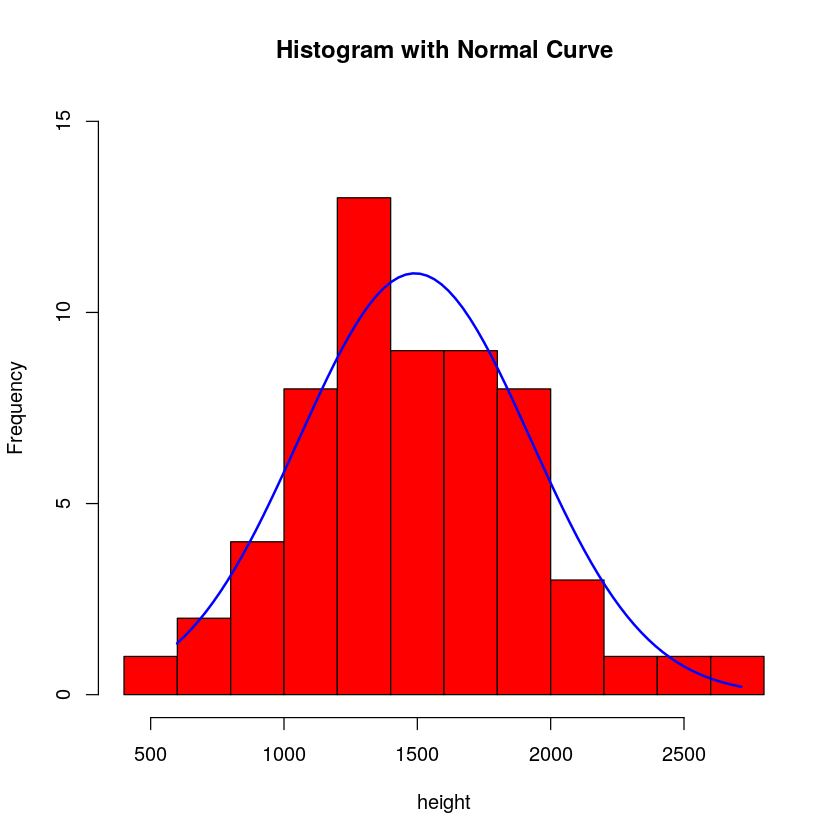

In [24]:
x <- samp
h<-hist(x, col="red", xlab="height",
main="Histogram with Normal Curve",
ylim=c(0,15),breaks=12)
xfit<-seq(min(x),max(x),length=80)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)

In [39]:
mean(samp)

[1] 1373,033

The typical size of the sample is between 1200 and 1400, as we can see in the histogram above.<br>
This is confirmed by the mean of the sample, which is about 1373.<br>
We interpreted "typical" as the histogram class with the highest frequency.

\begin{exercise}
Would you expect another student’s distribution to be identical to yours? Would you expect it to be similar? Why or why not?
\end{exercise}

We would expect another student's distribution to be similar to ours, regarding the shape of the distribution, but not identical, because every sample is random.<br>

Let's simulate another student's sample. We follow the same process as before:

In [52]:
population <- ames$Gr.Liv.Area
samp <- sample(population, 60)

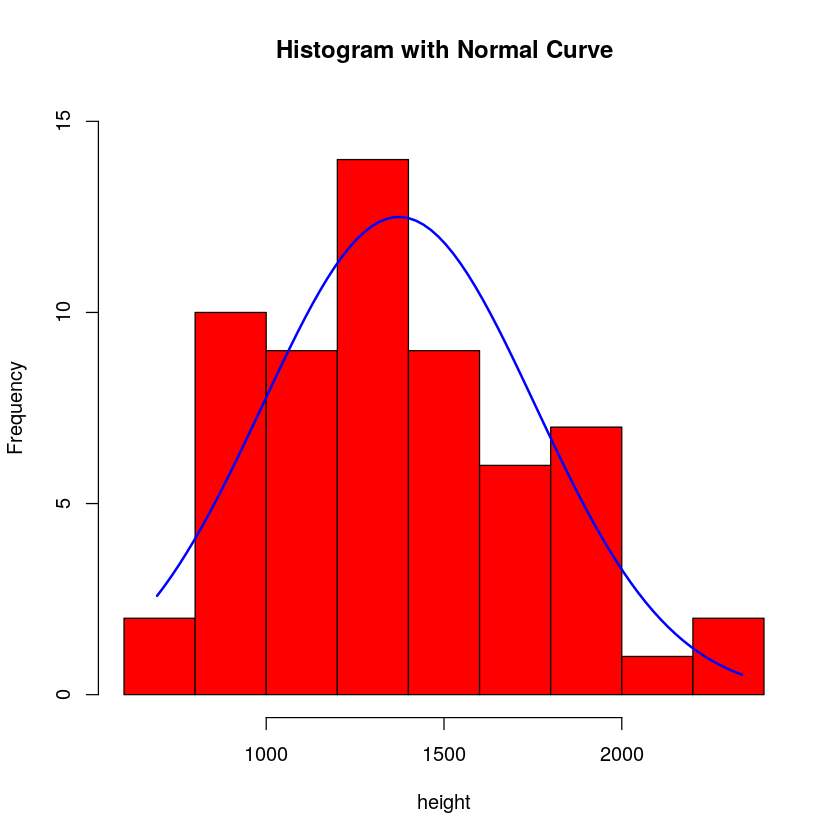

In [35]:
x <- samp
h<-hist(x, col="red", xlab="height",
main="Histogram with Normal Curve",
ylim=c(0,15))
xfit<-seq(min(x),max(x),length=80)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)

We observe that the distribution is similar, but not the same as before. This is expected, since the sampling is performed randomly.

## Confidence intervals

In [53]:
sample_mean <- mean(samp)

In [54]:
se <- sd(samp) / sqrt(60)
lower <- sample_mean - 1.96 * se
upper <- sample_mean + 1.96 * se
c(lower, upper)

[1] 1378,329 1713,704

\begin{exercise}
For the confidence interval to be valid, the sample mean must be normally distributed and have standard error s/√n. What conditions must be met for this to be true?
\end{exercise}

For the statement above to be true and the sample mean to be nearly normal, some
conditions have to be met. Firstly, the sample observations should be independent as well as
X̅. Also, the sample size should be big enough in order for our distribution(t-distribution) to
be an approximation of the normal one. The sample size should be greater than thirty(or
equal to that number). Finally, the population distribution should resemble the normal
distribution and not be too skewed.

\begin{exercise}
What does “95% confidence” mean? If you’re not sure, see Section 4.2.2.
\end{exercise}

95% confidence interval does not mean that the probability for the mean of the population to be in that interval is 0.95. Instead, it means that for every 100 samples that we take, 95 of them will have their sample mean within that interval.

\begin{exercise}
Does your confidence interval capture the true average size of houses in Ames? If you are working on this lab in a classroom, does your neighbor’s interval capture this value?
\end{exercise}

In [55]:
mean(population)

[1] 1499,69

Yes, our confidence interval capture the true average size of houses in Ames:<br>
1378,32886804241 < 1499,69044368601 < 1713,70446529093

\begin{exercise}
Each student in your class should have gotten a slightly different confidence interval. What proportion of those intervals would you expect to capture the true population mean? Why? If you are working in this lab in a classroom, collect data on the intervals created by other students in the class and calculate the proportion of intervals that capture the true population mean.
\end{exercise}

We expect that 95% of the confidence intervals created by the students would include the population mean.

<center>
    <b><font size="6",color='#00759c'> On your own</font></b>
 </center>


1.Using the following function (which was downloaded with the data set), plot all intervals. What proportion of your confidence intervals include the true population mean? Is this proportion exactly equal to the confidence level? If not, explain why.

CI: 1363,546 1623,821

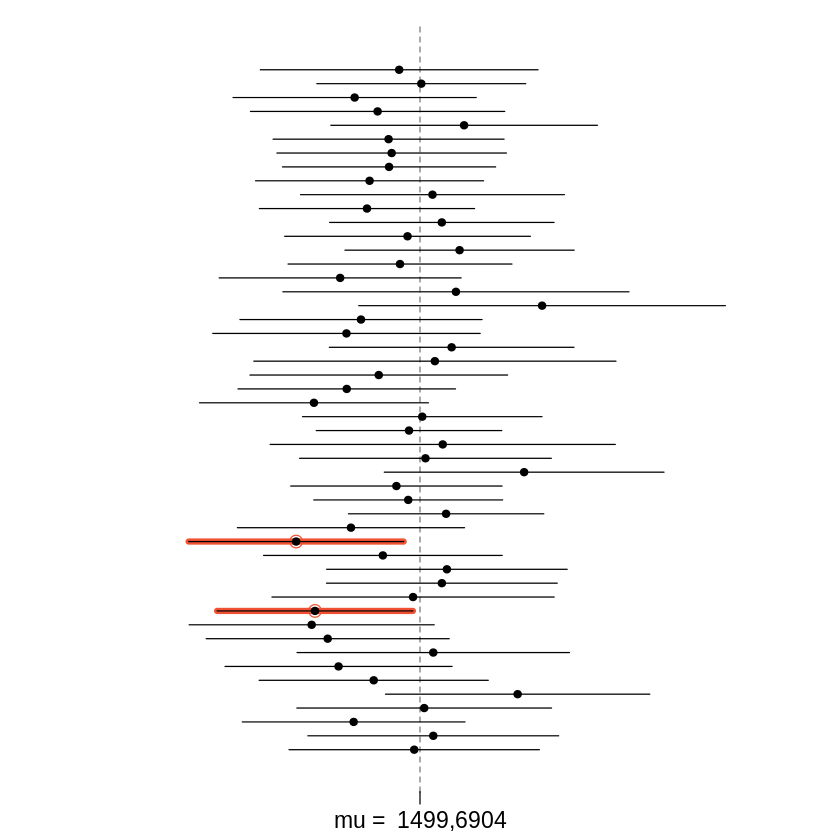

In [95]:
set.seed(8)

samp_mean <- rep(NA, 50)
samp_sd <- rep(NA, 50)
n <- 60


for(i in 1:50){
  samp <- sample(population, n) # obtain a sample of size n = 60 from the population
  samp_mean[i] <- mean(samp)    # save sample mean in ith element of samp_mean
  samp_sd[i] <- sd(samp)        # save sample sd in ith element of samp_sd
}

lower_vector <- samp_mean - 1.96 * samp_sd / sqrt(n) 
upper_vector <- samp_mean + 1.96 * samp_sd / sqrt(n)

cat("CI:",c(lower_vector[1], upper_vector[1]))

plot_ci(lower_vector, upper_vector, mean(population))


We see that 2 out of 50 confidence intervals do not contain the true mean of the population. The percentage is equal to 4% of the confidence intervals. So the proportion of our confidence intervals that includes the true population mean is equal to 96%. This proportion is a slightly bigger than the confidence level. This proportion is not necessarily the same as our confidence level but a very near approximation of it. The reason why we did not have 95% successful intervals was the randomness of the samples. 

2.Pick a confidence level of your choosing, provided it is not 95%. What is the appropriate critical value?

In [58]:
set.seed(10)

samp_mean <- rep(NA, 50)
samp_sd <- rep(NA, 50)
n <- 60

cl = 0.85
a = 1-cl
critical_value = qt(cl+a/2,n-1)
cat("For a confidence level of ",cl*100,"%, the critical value is:",critical_value)

For a confidence level of  85 %, the critical value is: 1,458522

3.Calculate 50 confidence intervals at the confidence level you chose in the previous question. You do not need to obtain new samples, simply calculate new intervals based on the sample means and standard deviations you have already collected. Using the plot_ci function, plot all intervals and calculate the proportion of intervals that include the true population mean. How does this percentage compare to the confidence level selected for the intervals?

CI: 1472,642 1671,591

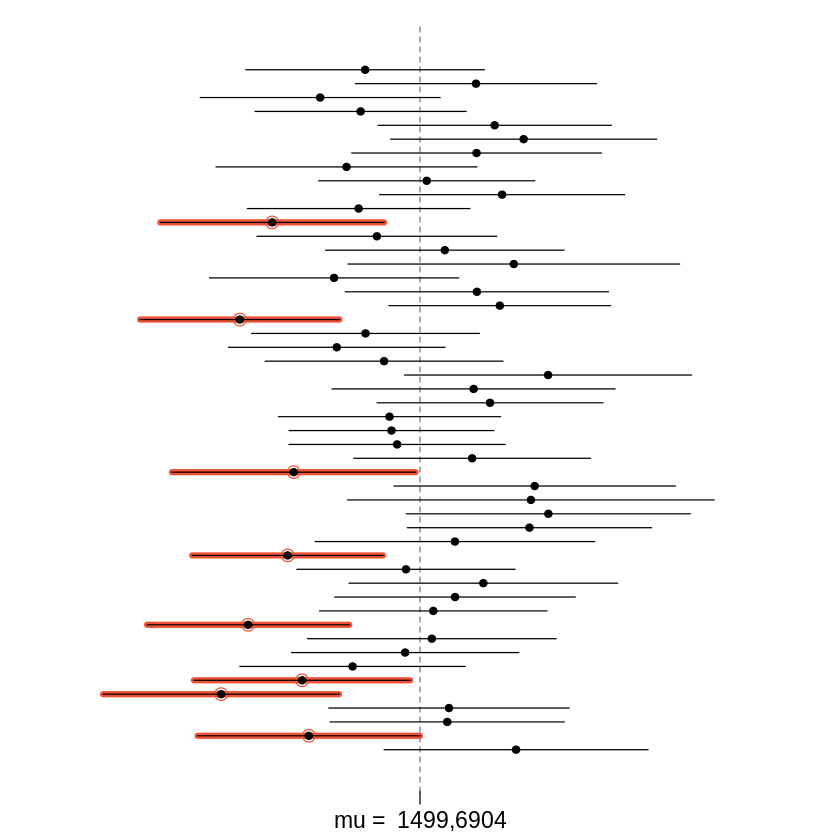

In [98]:
set.seed(10)
for(i in 1:50){
  samp <- sample(population, n) # obtain a sample of size n = 60 from the population
  samp_mean[i] <- mean(samp)    # save sample mean in ith element of samp_mean
  samp_sd[i] <- sd(samp)        # save sample sd in ith element of samp_sd
}

lower_vector <- samp_mean - critical_value * samp_sd / sqrt(n) 
upper_vector <- samp_mean + critical_value * samp_sd / sqrt(n)

cat("CI:",c(lower_vector[1], upper_vector[1]))

plot_ci(lower_vector, upper_vector, mean(population))

We see that 8 out of 50 confidence intervals do not contain the true mean of the population. The percentage is equal to 16% of the confidence intervals. So the proportion of our confidence intervals that includes the true population mean is equal to 84%. This proportion is a slightly smaller than the confidence level. This proportion is not necessarily the same as our confidence level but a very near approximation of it. The reason why we did not have 85% successful intervals was the randomness of the samples. 